## Hypothesis number 6

## Test background- Texas prisons are divided into 6 regions. 

1. H0- Increased COVID presence (Spikes) are not dependent on locations of prisons 

2. Alternate- Counties with prisons show increased presence of the disease (Cases numbers)



Index of tests

1. Running *t-test* on active case data for regions with prisons vs region with no prisons
2. Running the *Analysis of Variance* test on active case data for regions with prisons vs regions with no prisons
3. Repeating 1 and 2 for confirmed case data for Prison and Non Prison regions
4. *Linear regression and confidence* line plots for Active/Confirmed cases in Prison vs Non Prison regions


In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
url = "https://dshs.texas.gov/coronavirus/TexasCOVID-19ActiveCaseDatabyCounty.xlsx"

active = pd.read_excel(url , sheet_name = 'Active' ,skiprows=2)
active=active.truncate(before=0,after=253)
active2 = active.set_index('County')
active2

active=active.drop(['Notes'], axis=1)
active.keys()
active2 =active.set_index('County')
active2
from datetime import datetime
import re
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in active2.keys()]
import re
active3 = active2
pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
active3.columns=[pattern.findall(sub)[0] for sub in active3.keys()]
active3


,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,...,09-26,09-27,09-28,09-29,09-30,10-01,10-02,10-03,10-04,10-05
County,,,,,,,,,,,,,,,,,,,,,
Anderson,261.0,316.0,313.0,308.0,304.0,318.0,396.0,382.0,382.0,374.0,...,1121.0,1121.0,1118.0,1118.0,1118.0,1149.0,1149.0,1149.0,1149.0,1168.0
Andrews,313.0,313.0,313.0,313.0,360.0,337.0,337.0,334.0,332.0,331.0,...,396.0,396.0,396.0,396.0,424.0,211.0,211.0,211.0,211.0,198.0
Angelina,751.0,731.0,923.0,914.0,920.0,1001.0,1000.0,886.0,1031.0,1031.0,...,1184.0,1184.0,1356.0,1394.0,943.0,941.0,862.0,830.0,830.0,773.0
Aransas,103.0,101.0,96.0,97.0,86.0,89.0,89.0,87.0,87.0,100.0,...,227.0,225.0,214.0,205.0,195.0,179.0,184.0,171.0,163.0,153.0
Archer,45.0,44.0,44.0,44.0,27.0,19.0,18.0,25.0,24.0,24.0,...,18.0,18.0,14.0,15.0,18.0,21.0,21.0,21.0,21.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,357.0,392.0,391.0,391.0,415.0,428.0,446.0,456.0,429.0,428.0,...,1419.0,1419.0,1491.0,1491.0,1491.0,1521.0,1521.0,1521.0,1521.0,1610.0
Yoakum,112.0,110.0,110.0,110.0,78.0,58.0,57.0,57.0,65.0,65.0,...,43.0,43.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,26.0
Young,68.0,50.0,50.0,50.0,47.0,43.0,51.0,63.0,60.0,60.0,...,8.0,8.0,5.0,8.0,10.0,11.0,10.0,10.0,10.0,6.0


*We pull data that updates regularly*

In [4]:
#Prisons are divided by regions

region1active = active3.loc[['Polk', 'Tyler','Madison']]
region1Compareactive = active3.loc [['Wood','Moore','Newton']]
region1active.loc["Total"] = region1active.mean()
region1Compareactive.loc["Total"] = region1Compareactive.mean()


region2active = active3.loc[['Anderson','Bowie','Freestone']]
region2Compareactive = active3.loc [['Hardin', 'Victoria', 'Montague']]
region2active.loc["Total"] = region2active.mean() 
region2Compareactive.loc["Total"] = region2Compareactive.mean()

region3active = active3.loc[['Brazoria','Jefferson', 'Liberty', 'Fort Bend']]
region3Compareactive = active3.loc [['Bell', 'Smith', 'Henderson', 'Montgomery']]
region3active.loc["Total"] = region3active.mean()
region3Compareactive.loc["Total"] = region3Compareactive.mean()

region4active = active3.loc[['Frio','Karnes','Pecos','Bee','DeWitt','Medina']]
region4Compareactive = active3.loc [['Freestone', 'Reeves', 'Nolan', 'Kleberg', 'Lavaca','Lamar']]
region4active.loc["Total"] = region4active.mean()
region4Compareactive.loc["Total"] = region4Compareactive.mean()

region5active = active3.loc[['Wichita','Potter','Scurry','Gray','Hartley','Childress','Dawson','Mitchell']]
region5compareactive = active3.loc [['Grayson','Tom Green','Lee','Bandera','Martin','Refugio','Terry','Coleman']]
region5active.loc["Total"] = region5active.mean()
region5compareactive.loc["Total"] = region5compareactive.mean()

region6active = active3.loc[['Coryell','Grimes','Jones','Falls']]
region6compareactive = active3.loc [['Walker', 'Uvalde', 'Frio', 'Leon']]
region6active.loc["Total"] = region6active.mean()
region6compareactive.loc["Total"] = region6compareactive.mean()


In [5]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind 
import numpy as np

alpha = 0.05

# a print function to print the results of the tests
def print_test_results(test_name, test_statistic, p_value):
    print(test_name + ":")
    print("Statistic = " + str(test_statistic))
    print("p-value = " + str(p_value))
    if p_value < alpha:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")

print ("Active cases for Prison counties vs Non Prison counties")
print ("Region 1 vs an equivalent region")
ttest1 = ttest_ind(region1active.T["Total"], region1Compareactive.T["Total"])
print_test_results("T-Test", ttest1[0], ttest1[1])

print ("Region 2 vs an equivalent region")
ttest2 = ttest_ind(region2active.T["Total"], region2Compareactive.T["Total"])
print_test_results("T-Test", ttest2[0], ttest2[1])

print ("Region 3 vs an equivalent region")
ttest3 = ttest_ind(region3active.T["Total"], region3Compareactive.T["Total"])
print_test_results("T-Test", ttest3[0], ttest3[1])

print ("Region 4 vs an equivalent region")
ttest4 = ttest_ind(region4active.T["Total"], region4Compareactive.T["Total"])
print_test_results("T-Test", ttest4[0], ttest4[1])

print ("Region 5 vs an equivalent region")
ttest5 = ttest_ind(region5active.T["Total"], region5compareactive.T["Total"])
print_test_results

print ("Region 6 vs an equivalent region")
ttest6 = ttest_ind(region6active.T["Total"], region6compareactive.T["Total"])
print_test_results("T-Test", ttest6[0], ttest6[1])


Active cases for Prison counties vs Non Prison counties
Region 1 vs an equivalent region
T-Test:
Statistic = -4.879295458545074
p-value = 1.368240061210639e-06
Reject the null hypothesis
Region 2 vs an equivalent region
T-Test:
Statistic = -1.889915225373446
p-value = 0.05925429041836678
Fail to reject the null hypothesis
Region 3 vs an equivalent region
T-Test:
Statistic = 6.900902407058728
p-value = 1.3248853948399028e-11
Reject the null hypothesis
Region 4 vs an equivalent region
T-Test:
Statistic = -5.14858840712363
p-value = 3.5702283276460553e-07
Reject the null hypothesis
Region 5 vs an equivalent region
Region 6 vs an equivalent region
T-Test:
Statistic = 3.9245717600198
p-value = 9.701711809953232e-05
Reject the null hypothesis


For every region individualy, we reject the null hypothesis in terms of Active case numbers , using the t-test

ANOVA test


In [6]:
print ("Active cases for Prison counties vs Non Prison counties")
stats.f_oneway(region1active.T["Total"], region1Compareactive.T["Total"])
print(stats.f_oneway(region1active.T["Total"], region1Compareactive.T["Total"]))
stats.f_oneway(region2active.T["Total"], region2Compareactive.T["Total"])
print(stats.f_oneway(region2active.T["Total"], region2Compareactive.T["Total"]))
stats.f_oneway(region3active.T["Total"], region3Compareactive.T["Total"])
print(stats.f_oneway(region3active.T["Total"], region3Compareactive.T["Total"]))
stats.f_oneway(region4active.T["Total"], region4Compareactive.T["Total"])
print(stats.f_oneway(region4active.T["Total"], region4Compareactive.T["Total"]))
stats.f_oneway(region5active.T["Total"], region5compareactive.T["Total"])
print(stats.f_oneway(region5active.T["Total"], region5compareactive.T["Total"]))
stats.f_oneway(region6active.T["Total"], region6compareactive.T["Total"])
print(stats.f_oneway(region6active.T["Total"], region6compareactive.T["Total"]))


Active cases for Prison counties vs Non Prison counties
F_onewayResult(statistic=23.807524171778642, pvalue=1.3682400612105938e-06)
F_onewayResult(statistic=3.5717795590983807, pvalue=0.05925429041836455)
F_onewayResult(statistic=47.62245403174895, pvalue=1.3248853948398453e-11)
F_onewayResult(statistic=26.507962585967842, pvalue=3.570228327645959e-07)
F_onewayResult(statistic=30.060791807817452, pvalue=6.190722710047097e-08)
F_onewayResult(statistic=15.402263499544919, pvalue=9.701711809952684e-05)


For every region individually, we reject the null hypothesis in terms of Active cases , using the Analysis of Variance test

In [7]:
url = "https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyCaseCountData.xlsx"

confirmed = pd.read_excel(url , sheet_name = 'Cases by County' ,skiprows=2)
confirmed=confirmed.truncate(before=0,after=253)
confirmed = confirmed.set_index('County Name')

confirmed.keys()

from datetime import datetime
import re

pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
dates = [datetime.strptime(pattern.findall(sub)[0], '%m-%d') for sub in confirmed.keys()]
import re

pattern = re.compile('[0-9]+-[0-9]+', re.IGNORECASE)
confirmed.columns=[pattern.findall(sub)[0] for sub in confirmed.keys()]
confirmed

,03-04,03-05,03-06,03-07,03-08,03-09,03-10,03-11,03-12,03-13,...,09-26,09-27,09-28,09-29,09-30,10-01,10-02,10-03,10-04,10-05
County Name,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4958.0,4958.0,4954.0,4955.0,4957.0,4993.0,4993.0,4993.0,4993.0,5005.0
Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2637.0,2637.0,2637.0,2637.0,2665.0,2688.0,2688.0,2688.0,2688.0,2688.0
Angelina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6495.0,6495.0,6546.0,6577.0,6577.0,6577.0,6577.0,6577.0,6577.0,6627.0
Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,1920.0,1937.0,1942.0,1942.0,1949.0,1951.0,1951.0,1955.0
Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,931.0,931.0,937.0,940.0,945.0,951.0,958.0,958.0,958.0,968.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3283.0,3283.0,3325.0,3325.0,3325.0,3363.0,3363.0,3363.0,3363.0,3415.0
Yoakum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1127.0,1127.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1131.0,1157.0
Young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2328.0,2328.0,2332.0,2344.0,2349.0,2364.0,2370.0,2370.0,2370.0,2378.0


In [8]:
region1confirmed = confirmed.loc[['Polk', 'Tyler','Madison']]
region1Compareconfirmed = confirmed.loc [['Wood','Moore','Newton']]
region1confirmed.loc["Total"] = region1confirmed.mean()
region1Compareconfirmed.loc["Total"] = region1Compareconfirmed.mean()

region2confirmed = confirmed.loc[['Anderson','Bowie','Freestone']]
region2Compareconfirmed = confirmed.loc  [['Hardin', 'Victoria', 'Montague']]
region2confirmed.loc["Total"] = region2confirmed.mean()
region2Compareconfirmed.loc["Total"] = region2Compareconfirmed.mean()

region3confirmed = confirmed.loc[['Brazoria','Jefferson', 'Liberty', 'Fort Bend']]
region3Compareconfirmed = confirmed.loc [['Bell', 'Smith', 'Henderson', 'Montgomery']]
region3confirmed.loc["Total"] = region3confirmed.mean()
region3Compareconfirmed.loc["Total"] = region3Compareconfirmed.mean()

region4confirmed = confirmed.loc[['Frio','Karnes','Pecos','Bee','DeWitt','Medina']]
region4Compareconfirmed = confirmed.loc [['Freestone', 'Reeves', 'Nolan', 'Kleberg', 'Lavaca','Lamar']]
region4confirmed.loc["Total"] = region4confirmed.mean()
region4Compareconfirmed.loc["Total"] = region4Compareconfirmed.mean()

region5confirmed = confirmed.loc[['Wichita','Potter','Scurry','Gray','Hartley','Childress','Dawson','Mitchell']]
region5compareconfirmed = confirmed.loc [['Grayson','Tom Green','Lee','Bandera','Martin','Refugio','Terry','Coleman']]
region5confirmed.loc["Total"] = region5confirmed.mean()
region5compareconfirmed.loc["Total"] = region5compareconfirmed.mean()

region6confirmed = confirmed.loc[['Coryell','Grimes','Jones','Falls']]
region6compareconfirmed = confirmed.loc [['Walker', 'Uvalde', 'Frio', 'Leon']]
region6confirmed.loc["Total"] = region6confirmed.mean()
region6compareconfirmed.loc["Total"] = region6compareconfirmed.mean()


In [17]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind 
import numpy as np

alpha = 0.05

def print_test_results(test_name, test_statistic, p_value):
    print(test_name + ":")
    print("Statistic = " + str(test_statistic))
    print("p-value = " + str(p_value))
    if p_value < alpha:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")

print("Confirmed cases for Prison counties vs Non Prison Counties")

print ("Region 1 vs an equivalent region")
ttest1 = ttest_ind(region1confirmed.T["Total"], region1Compareconfirmed.T["Total"])
print_test_results("T-Test", ttest1[0], ttest1[1])

print ("Region 2 vs an equivalent region")
ttest2 = ttest_ind(region2confirmed.T["Total"], region2Compareconfirmed.T["Total"])
print_test_results("T-Test", ttest2[0], ttest2[1])

print ("Region 3 vs an equivalent region")
ttest3 = ttest_ind(region3confirmed.T["Total"], region3Compareconfirmed.T["Total"])
print_test_results("T-Test", ttest3[0], ttest3[1])

print ("Region 4 vs an equivalent region")
ttest4 = ttest_ind(region4confirmed.T["Total"], region4Compareconfirmed.T["Total"])
print_test_results("T-Test", ttest4[0], ttest4[1])

print ("Region 5 vs an equivalent region")
ttest5 = ttest_ind(region5confirmed.T["Total"], region5compareconfirmed.T["Total"])
print_test_results("T-Test", ttest5[0], ttest5[1])

print ("Region 6 vs an equivalent region")
ttest6 = ttest_ind(region6confirmed.T["Total"], region6compareconfirmed.T["Total"])
print_test_results("T-Test", ttest6[0], ttest6[1])


Confirmed cases for Prison counties vs Non Prison Counties
Region 1 vs an equivalent region
T-Test:
Statistic = -4.625915607911024
p-value = 4.1484840223945e-06
Reject the null hypothesis
Region 2 vs an equivalent region
T-Test:
Statistic = -5.288548603247124
p-value = 1.472625829608912e-07
Reject the null hypothesis
Region 3 vs an equivalent region
T-Test:
Statistic = 7.8421151668675915
p-value = 9.988955480200979e-15
Reject the null hypothesis
Region 4 vs an equivalent region
T-Test:
Statistic = 7.649422231253157
p-value = 4.2246119482365113e-14
Reject the null hypothesis
Region 5 vs an equivalent region
T-Test:
Statistic = 14.492438725381461
p-value = 7.191946241601895e-44
Reject the null hypothesis
Region 6 vs an equivalent region
T-Test:
Statistic = -2.8331774477453875
p-value = 0.004688585855657901
Reject the null hypothesis


For every region individually, we reject the null hypothesis using confirmed case numbers by the t-test

# ANOVA test

In [10]:

stats_f = stats.f_oneway(region1confirmed.T["Total"], region1Compareconfirmed.T["Total"])
print(stats_f)
stats_f = stats.f_oneway(region2confirmed.T["Total"], region2Compareconfirmed.T["Total"])
print(stats_f)
stats_f = stats.f_oneway(region3confirmed.T["Total"], region3Compareconfirmed.T["Total"])
print(stats_f)
stats_f = stats.f_oneway(region4confirmed.T["Total"], region4Compareconfirmed.T["Total"])
print(stats_f)
stats_f = stats.f_oneway(region5confirmed.T["Total"], region5compareconfirmed.T["Total"])
print(stats_f)
stats_f = stats.f_oneway(region6confirmed.T["Total"], region6compareconfirmed.T["Total"])
print(stats_f)

F_onewayResult(statistic=21.39909521151483, pvalue=4.148484022396461e-06)
F_onewayResult(statistic=27.96874632890716, pvalue=1.4726258296094771e-07)
F_onewayResult(statistic=61.498770290414754, pvalue=9.988955480204822e-15)
F_onewayResult(statistic=58.513660471989965, pvalue=4.224611948238203e-14)
F_onewayResult(statistic=210.0307802089363, pvalue=7.19194624160501e-44)
F_onewayResult(statistic=8.026894450413081, pvalue=0.004688585855660024)


For every individual region, we reject the null hypothesis using Confirmed case numbers using the Analysis of Variance test

We now consider rations of Confirmed/active cases, per region, along wiht Non Prison county comparable regions

In [11]:
x =region1confirmed.loc['Total']/region1active.loc['Total']
print("Ration of confirmed cases to active cases for region 1")
print(x)

Ration of confirmed cases to active cases for region 1
01-01    5.289030
01-02    5.871194
01-03    5.901176
01-04    5.985680
01-05    5.335277
           ...   
12-27    5.922330
12-28    6.100000
12-29    6.915730
12-30    7.358209
12-31    7.014085
Name: Total, Length: 581, dtype: float64


In [12]:
y = region1Compareconfirmed.loc['Total']/region1Compareactive.loc['Total']
print("Ration of confirmed cases to active cases for region 1-Comparison")
print(y)

Ration of confirmed cases to active cases for region 1-Comparison
01-01    4.487535
01-02    4.550562
01-03    4.563380
01-04    4.602273
01-05    4.032022
           ...   
12-27    5.328308
12-28    5.346218
12-29    4.984399
12-30    4.854545
12-31    4.623209
Name: Total, Length: 581, dtype: float64


In [13]:
#create new df with x and y values
mergedratios1 =pd.concat([x,y], axis=1)
mergedratios1.columns = ['R1-Prison', 'R1-Non Prison']
mergedratios1

,R1-Prison,R1-Non Prison
01-01,5.289030,4.487535
01-02,5.871194,4.550562
01-03,5.901176,4.563380
01-04,5.985680,4.602273
01-05,5.335277,4.032022
...,...,...
12-27,5.922330,5.328308
12-28,6.100000,5.346218
12-29,6.915730,4.984399
12-30,7.358209,4.854545


C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Active/Confirmed cases in Non Prison county')

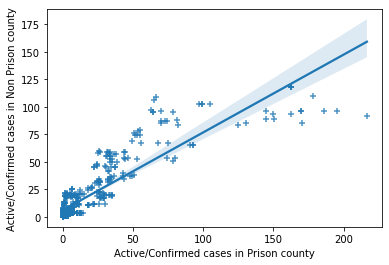

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x, y, marker='+')
plt.xlabel('Active/Confirmed cases in Prison county')
plt.ylabel('Active/Confirmed cases in Non Prison county')


C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:

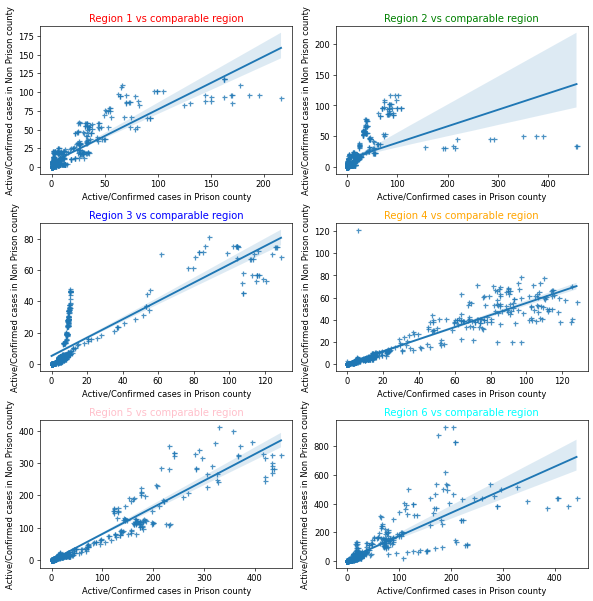

In [15]:
a =region2confirmed.loc['Total']/region2active.loc['Total']
b = region1Compareconfirmed.loc['Total']/region1Compareactive.loc['Total']
mergedratios2 =pd.concat([a,b], axis=1)
mergedratios2.columns = ['R2-Prison', 'R2-Non Prison']
mergedratios2


fig = plt.figure(figsize=(10,10) , dpi=60)

ax1 = fig.add_subplot(3,2,1)
sns.regplot(x, y, marker='+')
#give title to the subplot
ax1.set_title('Region 1 vs comparable region', color = 'red')
plt.xlabel('Active/Confirmed cases in Prison county')
plt.ylabel('Active/Confirmed cases in Non Prison county')


ax2 = fig.add_subplot(3,2,2)
sns.regplot(a, b, marker='+')
ax2.set_title('Region 2 vs comparable region' , color = 'green')
plt.xlabel('Active/Confirmed cases in Prison county')
plt.ylabel('Active/Confirmed cases in Non Prison county')

c=region3confirmed.loc['Total']/region3active.loc['Total']
d= region3Compareconfirmed.loc['Total']/region3Compareactive.loc['Total']
mergedratios3 =pd.concat([c,d], axis=1)
mergedratios3.columns = ['R-3Prison', 'R3-Non Prison']

ax3 = fig.add_subplot(3,2,3)
sns.regplot(c, d, marker='+')
ax3.set_title('Region 3 vs comparable region', color = 'blue')
plt.xlabel('Active/Confirmed cases in Prison county')
plt.ylabel('Active/Confirmed cases in Non Prison county')

e=region4confirmed.loc['Total']/region4active.loc['Total']
f= region4Compareconfirmed.loc['Total']/region4Compareactive.loc['Total']
mergedratios4 =pd.concat([e,f], axis=1)
mergedratios4.columns = ['R4-Prison', 'R4-Non Prison']

ax4 = fig.add_subplot(3,2,4)
sns.regplot(e, f, marker='+')
ax4.set_title('Region 4 vs comparable region', color = 'orange')
plt.xlabel('Active/Confirmed cases in Prison county')
plt.ylabel('Active/Confirmed cases in Non Prison county')

g=region5confirmed.loc['Total']/region5active.loc['Total']
h= region5compareconfirmed.loc['Total']/region5compareactive.loc['Total']
mergedratios5 =pd.concat([g,h], axis=1)
mergedratios5.columns = ['R5-Prison', 'R5-Non Prison']

ax5 = fig.add_subplot(3,2,5)
sns.regplot(g, h, marker='+')
ax5.set_title('Region 5 vs comparable region', color = 'pink')
plt.xlabel('Active/Confirmed cases in Prison county')
plt.ylabel('Active/Confirmed cases in Non Prison county')

i=region6confirmed.loc['Total']/region6active.loc['Total']
j= region6compareconfirmed.loc['Total']/region6compareactive.loc['Total']
mergedratios6 =pd.concat([i,j], axis=1)
mergedratios6.columns = ['R6-Prison', 'R6-Non Prison']

ax6 = fig.add_subplot(3,2,6)
sns.regplot(i, j, marker='+')
ax6.set_title('Region 6 vs comparable region' , color = 'cyan')
plt.xlabel('Active/Confirmed cases in Prison county')
plt.ylabel('Active/Confirmed cases in Non Prison county')

#tight layout
plt.tight_layout()
#save the plot
fig.set_facecolor('white')
plt.savefig('Prison_vs_Non_Prison_ratios.png', dpi=300)


Based on regression plots, 67% of counties in the prison region have a higher proportion of active cases compared to the non prison region.
Or 67% of counties with prisons in them have higher number of cases than counties with no prisons in them.

In [16]:
CombinedDF = pd.concat([mergedratios1,mergedratios2,mergedratios3,mergedratios4,mergedratios5,mergedratios6], axis=1)
CombinedDF

,R1-Prison,R1-Non Prison,R2-Prison,R2-Non Prison,R-3Prison,R3-Non Prison,R4-Prison,R4-Non Prison,R5-Prison,R5-Non Prison,R6-Prison,R6-Non Prison
01-01,5.289030,4.487535,5.230663,4.487535,3.470326,2.804991,11.782082,5.023287,6.489808,5.162817,7.449315,10.648315
01-02,5.871194,4.550562,5.466138,4.550562,3.464732,2.805505,12.242767,4.646275,6.515348,5.086483,7.843269,10.573171
01-03,5.901176,4.563380,5.182186,4.563380,3.459041,2.805505,11.960880,4.737199,6.517913,5.106662,7.854808,9.648649
01-04,5.985680,4.602273,5.134089,4.602273,3.450796,2.607544,12.496807,4.773151,6.528194,5.090250,7.908035,9.105607
01-05,5.335277,4.032022,4.803783,4.032022,3.806927,2.712916,11.856231,4.752142,6.225000,5.260643,7.665377,10.067938
...,...,...,...,...,...,...,...,...,...,...,...,...
12-27,5.922330,5.328308,7.411265,5.328308,3.710660,3.037515,9.106936,4.627215,5.942581,4.627130,8.474501,11.606727
12-28,6.100000,5.346218,8.043829,5.346218,3.676076,3.037951,12.635027,4.555763,5.975419,4.674508,8.858633,12.186235
12-29,6.915730,4.984399,6.720822,4.984399,3.635670,2.819687,10.929062,5.364561,5.940126,4.830257,7.383970,13.376833
12-30,7.358209,4.854545,6.845204,4.854545,3.537327,2.869767,10.617420,4.722257,6.061076,5.443603,7.207207,10.454343


This is a final dataframe created by combining case rations above, for every prison county region in Texas vs every Non-prison county region. The ratios in Prison regions are consistently higher than their corresponding non prison regions.